## Students:
- Nima Abdollahi (s341890)
- Glaysa Fernandez (s344047)

## Chosen Algorithm
We chose the blabla algorithm because ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/Ruter-data.csv"
df_original = pd.read_csv(url, sep=';')
df_original.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


#### Filter the original df containing only 'Dato', 'Linjenavn' and 'Passasjerer_Ombord' columns
We chose to work on the bus line number 300.

In [3]:
df = df_original.filter(['Dato','Linjenavn','Passasjerer_Ombord'], axis=1)
df = df[df['Linjenavn'] == '300']
df.head()

,Dato,Linjenavn,Passasjerer_Ombord
1159,10/06/2020,300,38
1160,07/08/2020,300,-1
1161,23/07/2020,300,12
1162,11/06/2020,300,9
1164,16/06/2020,300,7


#### Replace all negative values from 'Passasjerer_Ombord' to a mean value.

In [4]:
#Data cleaning: negative values
median_passasjerer_ombord = df['Passasjerer_Ombord'].median()
for index, row in df.iterrows():
    if row['Passasjerer_Ombord'] < 0:
        df.loc[index,'Passasjerer_Ombord'] =  median_passasjerer_ombord
        
df.head()

,Dato,Linjenavn,Passasjerer_Ombord
1159,10/06/2020,300,38
1160,07/08/2020,300,6
1161,23/07/2020,300,12
1162,11/06/2020,300,9
1164,16/06/2020,300,7


#### Convert 'Dato' column to datetime then to numeric

In [5]:
df["Dato"] = pd.to_datetime(df["Dato"])
df["Dato"] = pd.to_numeric(df["Dato"])
df.index = np.arange(0, len(df)) # change index to start at 0
df.head()

,Dato,Linjenavn,Passasjerer_Ombord
0,1601942400000000000,300,38
1,1594166400000000000,300,6
2,1595462400000000000,300,12
3,1604620800000000000,300,9
4,1592265600000000000,300,7


#### Sum the number of passenger per date

In [6]:
arr = df.groupby('Dato', as_index=False).agg({'Passasjerer_Ombord':'sum'})

#### Checked the correlation

In [7]:
cm = arr.corr()
cm.style.background_gradient(cmap="coolwarm")

,Dato,Passasjerer_Ombord
Dato,1.000000,0.078535
Passasjerer_Ombord,0.078535,1.000000


#### Created a scatter plot

<AxesSubplot:xlabel='Dato', ylabel='Passasjerer_Ombord'>

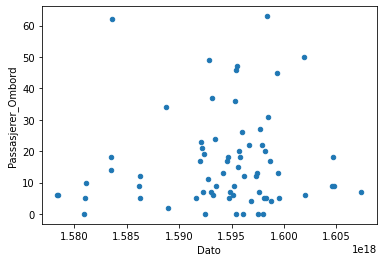

In [8]:
arr.plot.scatter(x="Dato", y='Passasjerer_Ombord')

## Model Training

- Extracted the necessary dataset

In [9]:
x = pd.DataFrame(df['Dato'])
y = pd.DataFrame(df['Passasjerer_Ombord'])

#### Now, split the set in training and testing set.
- test_size = 0.33 tell the function that 1/3 of values should be put in test array
- random_state = is a variable that seeds the random generator. In that way you'll get the same training and testing set each run 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

- Instantiated and executed linear regression on the training set.

In [11]:
linear_regressor = LinearRegression()

In [12]:
linear_regressor.fit(x_train, y_train)

LinearRegression()

- Make a prediction

MSE = 35.92434820151121


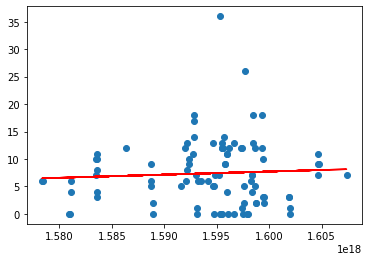

In [13]:
y_pred = linear_regressor.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
print( "MSE = "+str(metrics.mean_squared_error(y_train,y_pred)))

## Model Testing

MSE = 111.07701857465382


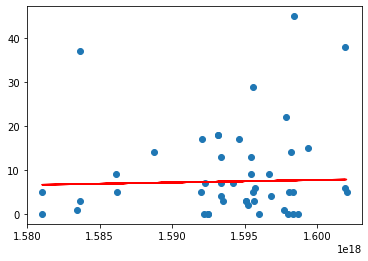

In [14]:
y_pred = linear_regressor.predict(x_test)  # Predict the model on x_test
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
print( "MSE = "+str(metrics.mean_squared_error(y_test,y_pred)))

## Model Prediction
Tested model to todays date.

In [15]:
t = pd.to_datetime('today')
today = int(t.timestamp() * 10**9)
linear_regressor.predict([[today]])

array([[9.68691757]])